# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####  데이터 수집

In [ ]:
#데이터셋을 로드
from sklearn.datasets import load_boston
boston=load_boston()

####  데이터 이해

In [ ]:
#데이터셋 정보확인

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

![image.png](./images/boston_features.png)

In [ ]:
boston.data

array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,
          4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,
          9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,
          4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,
          6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          7.88   ]])

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
boston.data

array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,
          4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,
          9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,
          4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,
          6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          7.88   ]])

In [ ]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

boston_df=pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df["price"]=boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가

In [ ]:
#데이터의 크기와 형태를 확인(행, 열)
boston_df.shape

(506, 14)

In [ ]:
# 데이터프레임 정보
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [ ]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.

In [ ]:
# CHAS 컬럼 확인
boston_df.CHAS

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [ ]:
boston_df.drop(['CHAS'],axis=1, inplace=True)

In [ ]:
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화 ->12개

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

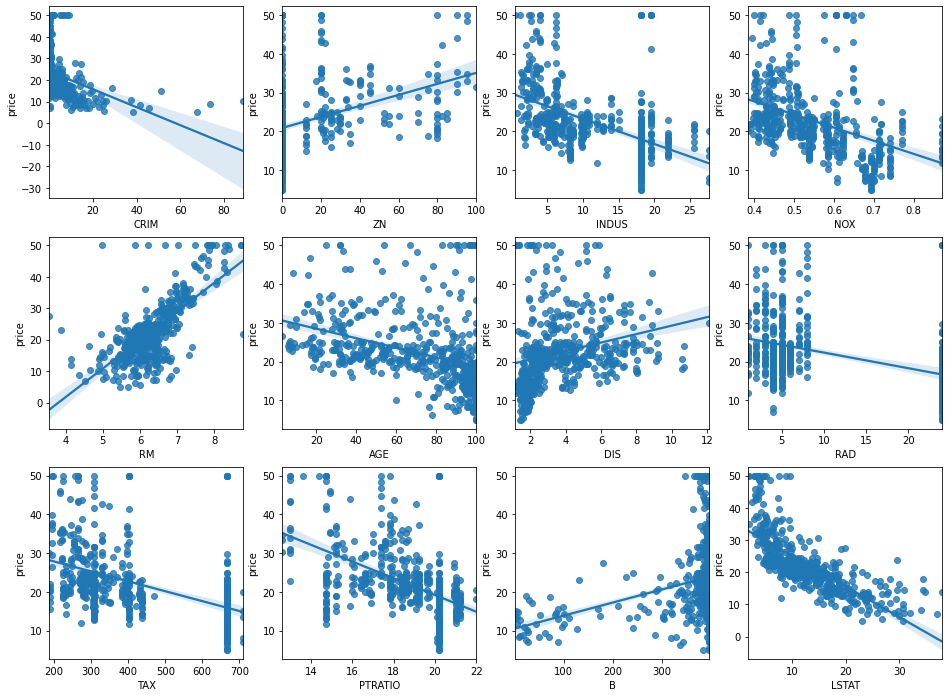

In [ ]:
fig, axs =plt.subplots(figsize=(16,12), nrows=3, ncols=4)

x_features = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i , feature in enumerate(x_features):
    row=int(i/4)
    col=i%4
    
    sns.regplot(x=feature, y='price', data=boston_df, ax=axs[row][col])

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)
#### pairplot(): 수치형 변수에 적용 가능

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

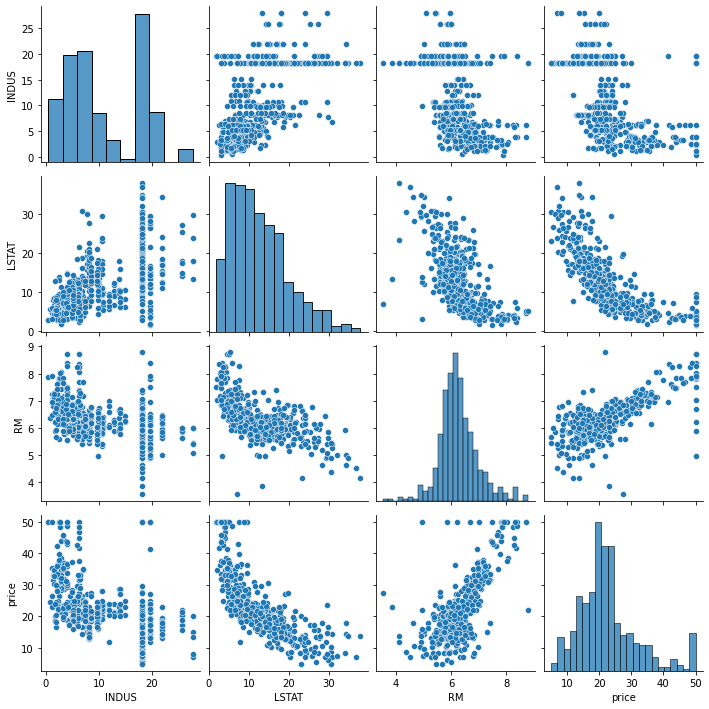

In [ ]:
ccol=['INDUS','LSTAT','RM','price']

sns.pairplot(boston_df[ccol])

In [ ]:
corrs=boston_df[ccol].corr()
corrs

,INDUS,LSTAT,RM,price
INDUS,1.000000,0.603800,-0.391676,-0.483725
LSTAT,0.603800,1.000000,-0.613808,-0.737663
RM,-0.391676,-0.613808,1.000000,0.695360
price,-0.483725,-0.737663,0.695360,1.000000


<AxesSubplot:>

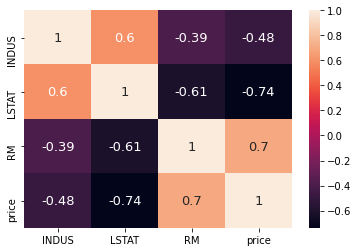

In [ ]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()
sns.heatmap(corrs, annot=True, annot_kws={'size':13})

In [ ]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션



# 보스턴 집값 다중선형회귀 분석(사이킷런) ->머신러닝 단계

In [ ]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체

### 데이터 준비

#### 데이터 분할

In [ ]:

# X(독립변수), Y(종속변수) 분할
x= boston_df.drop(['price'],axis=1)   #inplace=True 안하면 카피본
y= boston_df['price']


# 학습용 데이터와 평가용 데이터로 분할하기
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
#X_train 데이터 일부 확인


### 모델 클래스 선택

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

### 모델 구축 

In [ ]:
#학습 수행

reg.fit(x_train, y_train)


LinearRegression()

### 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#평가용 함수
def eval_score(y_test,y_pred) :
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    print('MSE: ', np.round(mse, 3))
    print('RMSE: ', np.round(rmse, 3))
    print('R2: ', np.round(r2, 3))

In [ ]:


# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred=reg.predict(x_test)

# 평가 지표 계산
eval_score(y_test,y_pred)


MSE:  21.697
RMSE:  4.658
R2:  0.709


In [ ]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기
n=len(x_train)

#독립변수의 갯수
k=len(x_train.columns)

# 수정된 결정 계수
adj_r2 =1-((1-r2)*(n-1))/(n-k-1)
print('adj_r2 : ',adj_r2)


NameError: name 'r2' is not defined

![image.png](./images/adjusted_r2.png)

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [ ]:
# 회귀 계수 확인: 각각의 독립변수의 설명력 확인

# ndarray의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress=True)
# 회귀 계수와 절편 값 확인
print('Y절편 : {:.3f}'.format(reg.intercept_))
print('회귀계수 : ',np.round(reg.coef_,3))
# ndarray의 실수 출력 옵션 복구
np.set_printoptions(suppress=False)

Y절편 : 31.428
회귀계수 :  [ -0.142   0.038   0.073 -14.901   4.146  -0.009  -1.418   0.277  -0.01
  -0.937   0.013  -0.566]


In [ ]:
# 본래의 출력 옵션


In [ ]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef= pd.Series(data=np.round(reg.coef_,3), index=x.columns)
#회귀 계수값을 기준으로 내림차순으로 정렬
coef.sort_values(ascending=False)


RM          4.146
RAD         0.277
INDUS       0.073
ZN          0.038
B           0.013
AGE        -0.009
TAX        -0.010
CRIM       -0.142
LSTAT      -0.566
PTRATIO    -0.937
DIS        -1.418
NOX       -14.901
dtype: float64

In [ ]:
#회귀식 만들기
print("y="+str(reg.intercept_)+"+")
for i, c in zip(coef.index, coef.values):
    print('('+str(c)+')*'+str(i)+'+')

y=31.428479482300745+
(-0.142)*CRIM+
(0.038)*ZN+
(0.073)*INDUS+
(-14.901)*NOX+
(4.146)*RM+
(-0.009)*AGE+
(-1.418)*DIS+
(0.277)*RAD+
(-0.01)*TAX+
(-0.937)*PTRATIO+
(0.013)*B+
(-0.566)*LSTAT+


In [ ]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦


###  실제값과 예측값의 분포차이를 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

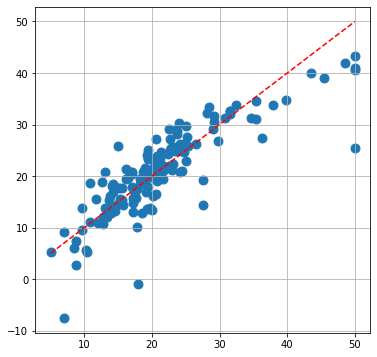

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80)
plt.grid()
plt.plot([5,50],[5,50],color='r',ls='--')
plt.show
         

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [ ]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.
import statsmodel.api a


# 훈련 데이터로 학습 수행

# 검증 데이터로 예측 수행

#평가 지표 값 확인


# [응용1] 다중 선형회귀 연습 - load_diabetes

### 필요한 모듈 import

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes



In [ ]:
diab=load_diabetes()
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

### 데이터 수집

In [ ]:
x=pd.DataFrame(data=diab.data, columns=diab.feature_names)
y=diab.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

### 데이터 이해

In [ ]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### 데이터 준비

In [ ]:
x=diab.data
y=diab.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

### 모델 구축

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

### 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#평가용 함수
def eval_score(y_test,y_pred) :
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    print('MSE: ', np.round(mse, 3))
    print('RMSE: ', np.round(rmse, 3))
    print('R2: ', np.round(r2, 3))

In [ ]:

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred=reg.predict(x_test)

# 평가 지표 계산
eval_score(y_test,y_pred)


MSE:  2821.739
RMSE:  53.12
R2:  0.477


#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [ ]:
print('Y절편 : {:.3f}'.format(reg.intercept_))
print('회귀계수 : ',np.round(reg.coef_,3))

Y절편 : 151.008
회귀계수 :  [  29.25  -261.708  546.297  388.401 -901.953  506.761  121.148  288.029
  659.271   41.375]


###  실제값과 예측값의 분포차이를 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

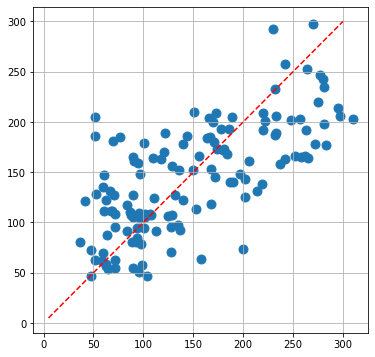

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80)
plt.grid()
plt.plot([5,300],[5,300],color='r',ls='--')
plt.show
         

# [응용2] 캘리포니아 주택 가격

<img src='./images/cali_house_features.png' width="450" height="450"/>

### 데이터 수집 및 탐색

In [ ]:
#fetch data이므로 온라인으로만 fetch가능
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')


In [ ]:
# 샘플:20640

In [ ]:
#속성 :8개

### 시각화로 탐색

In [ ]:
#데이터프레임으로 변환

# 기초 통계량 확인


In [ ]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색


In [ ]:
# 독립변수 간 상관관계 확인

In [ ]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다

#pairplot 시각화


In [ ]:
# 위경도 데이터 시각화

# 위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 색깔을 다르게 한다


In [ ]:
# 상관 계수 히트맵

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션


In [ ]:
# 선형회귀 모델 구축

# 회귀식으로 표현


# 결과 시각화 ( actual price VS predicted price)

In [ ]:


# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기


# 평가 지표 계산


# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기


#독립변수의 갯수

# 수정된 결정 계수


# 펭귄 몸무게 예측(dacon)

# 자전거 대여 수요 예측(Kaggle)

- datetime: hourly date + timestamp
- season: 1=봄, 2=여름, 3=가을, 4=겨울
- holiday: 1=토, 일요일의 주말을 제외한 국경일 등의 휴일, 0= 휴일이 아닌 날
- workingday: 1=토, 일요일의 주말 및 휴일이 아닌 주중, 0=주말 및 휴일
- weather:
* 1 : 맑음, 약간 구름 낀 흐림
* 2 : 안개, 안개  + 흐림
* 3 : 가벼운 눈, 가벼운 비 + 천둥
* 4 : 심한 눈/비, 천둥/번개

- temp: 온도(섭씨)
- atemp: 체감온도
- humidity: 상대 습도
- windspeed: 풍속
- casual: 사전에 등록되지 않은 사용자가 대여한 횟수
- registered: 사전에 등록한 사용자가 대여한 횟수
- count: 대여 횟수

------------------------------------------------------------------------------

## 회귀 트리를 이용한 예측은 추후 추가
- RandomForestRegressor
- GradientBoostRegressor
- XGBRegressor
- LGBMRegressor